## Decision Tree Regression

Automatically created module for IPython interactive environment


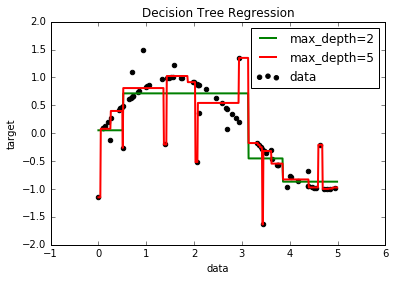

In [3]:
print(__doc__)

# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

%matplotlib inline

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="data")
plt.plot(X_test, y_1, c="g", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, c="r", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## Linear Regression

Automatically created module for IPython interactive environment
Coefficients: 
 [ 938.23786125]
Residual sum of squares: 2548.07
Variance score: 0.47


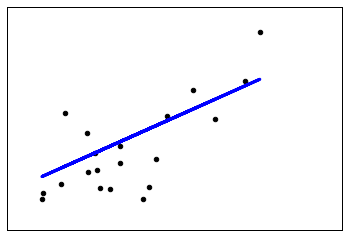

In [4]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Bayesian Ridge Regression

Automatically created module for IPython interactive environment


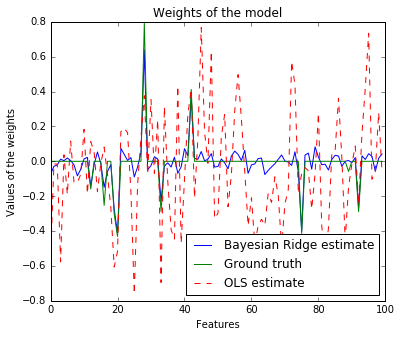

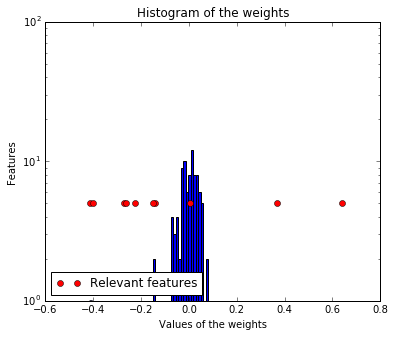

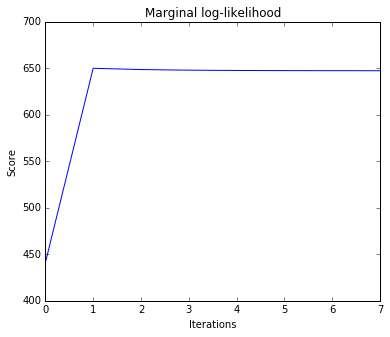

In [5]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import BayesianRidge, LinearRegression

###############################################################################
# Generating simulated data with Gaussian weigthts
np.random.seed(0)
n_samples, n_features = 100, 100
X = np.random.randn(n_samples, n_features)  # Create Gaussian data
# Create weigts with a precision lambda_ of 4.
lambda_ = 4.
w = np.zeros(n_features)
# Only keep 10 weights of interest
relevant_features = np.random.randint(0, n_features, 10)
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1. / np.sqrt(lambda_))
# Create noise with a precision alpha of 50.
alpha_ = 50.
noise = stats.norm.rvs(loc=0, scale=1. / np.sqrt(alpha_), size=n_samples)
# Create the target
y = np.dot(X, w) + noise

###############################################################################
# Fit the Bayesian Ridge Regression and an OLS for comparison
clf = BayesianRidge(compute_score=True)
clf.fit(X, y)

ols = LinearRegression()
ols.fit(X, y)

###############################################################################
# Plot true weights, estimated weights and histogram of the weights
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, 'b-', label="Bayesian Ridge estimate")
plt.plot(w, 'g-', label="Ground truth")
plt.plot(ols.coef_, 'r--', label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

plt.figure(figsize=(6, 5))
plt.title("Histogram of the weights")
plt.hist(clf.coef_, bins=n_features, log=True)
plt.plot(clf.coef_[relevant_features], 5 * np.ones(len(relevant_features)),
         'ro', label="Relevant features")
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc="lower left")

plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_)
plt.ylabel("Score")
plt.xlabel("Iterations")
plt.show()

## Association Analysis
### - Market Basket Analysis

In [1]:
#!/usr/bin/env python3
# 출처 : https://github.com/siwest/market_basket/blob/master/market_basket.py

"""Market basket python program."""

import sys, getopt
    
def read_data(file_name):
    """Read a csv file that lists possible transactions"""
    result = list()
    with open(file_name, 'r') as file_reader:
        for line in file_reader:
            order_set = set(line.strip().split(','))
            result.append(order_set)
    return result


def support_count(orders, item_set):
    """Calculate support count of item set from orders 2D list"""
    count = 0

    for order in orders:
        if item_set.issubset(order):
            # print("Found {} in {}".format(item_set, order))
            count += 1
        else:
            # print("Didn't find {} in {}".format(item_set, order))
            pass
    return count


def support_frequency(orders, item_set):
    """Calculate support frequency of item set from orders 2D list"""
    N = len(orders)
    return support_count(orders, item_set)/float(N)


def confidence(orders, left, right):
    """Calculate confidence of item set from orders 2D list"""
    left_count = support_count(orders, left)
    right = right.union(left)
    right_count = support_count(orders, right)
    result = right_count/left_count
    return result


def apriori(orders, support_threshold, confidence_threshold):
    """Accepts a list of item sets (i.e. orders) and returns a list of
    association rules matching support and confidence thresholds. """
    candidate_items = set()

    for items in orders:
        candidate_items = candidate_items.union(items)

    # print("Candidate items are {}".format(candidate_items))

    def apriori_next(item_set=set()):
        """Accepts a single item set and returns list of all association rules
        containing item_set that match support and confidence thresholds.
        """
        result = []

        # print("Calling APN with {}".format(item_set))
        # print("Candidates are {}".format(candidate_items))

        if len(item_set) == len(candidate_items):
            # Recursion base case.
            # print("{} == {}".format(item_set, candidate_items))
            return result

        elif not item_set:
            # Initialize with every item meeting support threshold.
            # print("Initializing APN.\n")
            for item in candidate_items:
                item_set = {item}
                if support_frequency(orders, item_set) >= support_threshold:
                    # print("Item '{}' crosses support threshold".format(item))
                    result.extend(apriori_next(item_set))
                else:
                    pass

        else:
            # Given an item set, find all candidate items meeting thresholds
            for item in candidate_items.difference(item_set):
                # print("Testing {}".format(item_set.union({item})))
                if confidence(orders, item_set, {item}) >=\
                        confidence_threshold:
                    # print("\n\n{} => {} crosses confidence threshold at {}".format(item_set, item, confidence(orders, item_set, {item})))
                    if support_frequency(orders, item_set.union({item})) >=\
                            support_threshold:
                       #print("\nItem set {} crosses support threshold at {}".format(item_set.union({item}), support_frequency(orders, item_set.union({item}))))
                        result.append((item_set, item))
                        result.extend(apriori_next(item_set.union({item})))
                    else:
                        pass
                else:
                    pass

        return [rule for rule in result if rule]

    return apriori_next()


In [4]:
filepath = './data/Home_store.csv'
data = read_data(filepath)

final_results = ["{} => {}  s = {:0.2f}, c = {:0.2f}".format(
    item_set, item, support_frequency(data[1:], item_set.union({item})),
    confidence(data[1:], item_set, {item})) for item_set, item in apriori(
    data[1:], 0.2, 1)]

print("calculation complete!!")

for result in final_results:
    print(result)

calculation complete!!
{'Disinfecting wipes'} => Diapers  s = 0.55, c = 1.00
{'Lotion'} => Soap  s = 0.35, c = 1.00
{'Soap', 'Lotion'} => Handwash  s = 0.35, c = 1.00
{'Lotion'} => Handwash  s = 0.35, c = 1.00
{'Handwash', 'Lotion'} => Soap  s = 0.35, c = 1.00
{'Plates'} => Cutlery  s = 0.40, c = 1.00
{'Shampoo'} => Soap  s = 0.40, c = 1.00
{'Soap', 'Shampoo'} => Conditioner  s = 0.40, c = 1.00
{'Shampoo'} => Conditioner  s = 0.40, c = 1.00
{'Shampoo', 'Conditioner'} => Soap  s = 0.40, c = 1.00
{'Handwash'} => Lotion  s = 0.35, c = 1.00
{'Handwash', 'Lotion'} => Soap  s = 0.35, c = 1.00
{'Handwash'} => Soap  s = 0.35, c = 1.00
{'Soap', 'Handwash'} => Lotion  s = 0.35, c = 1.00
{'Foil'} => Detergent  s = 0.40, c = 1.00
{'Conditioner'} => Soap  s = 0.40, c = 1.00
{'Soap', 'Conditioner'} => Shampoo  s = 0.40, c = 1.00
{'Conditioner'} => Shampoo  s = 0.40, c = 1.00
{'Shampoo', 'Conditioner'} => Soap  s = 0.40, c = 1.00
{'Diapers'} => Disinfecting wipes  s = 0.55, c = 1.00


## Naive Bayes

- http://bayespy.org/en/latest/examples/multinomial.html

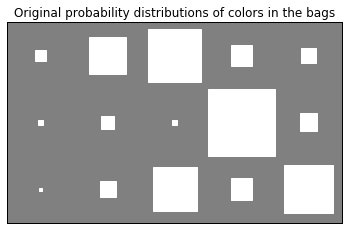

In [5]:
from bayespy import nodes
import numpy as np
import bayespy.plot as bpplt

%matplotlib inline

n_colors = 5  # number of possible colors
n_bags = 3    # number of bags
n_trials = 20 # number of draws from each bag

p_colors = nodes.Dirichlet(n_colors * [0.5], plates=(n_bags,)).random()

bpplt.hinton(p_colors)
bpplt.pyplot.title("Original probability distributions of colors in the bags");


[[ 0  5 10  3  2]
 [ 1  0  0 17  2]
 [ 0  0 11  1  8]]
Iteration 1: loglike=-2.595503e+01 (0.001 seconds)
Iteration 2: loglike=-2.595503e+01 (0.001 seconds)
Converged at iteration 2.


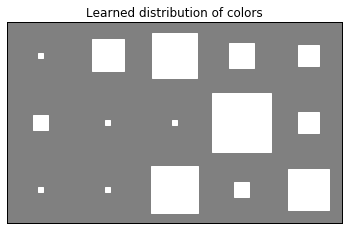

In [6]:
marbles = nodes.Multinomial(n_trials, p_colors).random()
print(marbles)

theta = nodes.Dirichlet(n_colors * [0.5], plates=(n_bags,))
y = nodes.Multinomial(n_trials, theta)
y.observe(marbles)

from bayespy.inference import VB
Q = VB(y, theta)
Q.update(repeat=1000)

import bayespy.plot as bpplt
bpplt.hinton(theta)
bpplt.pyplot.title("Learned distribution of colors")
bpplt.pyplot.show()